In [22]:
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from tqdm.contrib.itertools import product

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [28]:
results = []

NUM_PARTICLES = [100, 500, 4000, 10000]
NUM_PROCS = [2, 4, 5, 10]

for num_part, num_procs in product(NUM_PARTICLES, NUM_PROCS):
    # Run parallel version
    result = subprocess.run(["mpirun", "-n", str(num_procs), "./bin/md1d_parallel", str(num_part), "0.01", "10000", "1"], stdout=subprocess.PIPE)

    results.append({
        'num_particles': num_part,
        'time': float(result.stdout.decode('utf-8')),
        'type': f"parallel-{num_procs}",
    })


    # Run original version
    result = subprocess.run(["./bin/md1d", str(num_part), "0.01", "10000", "1"], stdout=subprocess.PIPE)

    results.append({
        'num_particles': num_part,
        'time': float(result.stdout.decode('utf-8')),
        'type': 'original',
    })

  0%|          | 0/16 [00:00<?, ?it/s]

In [31]:
df = pd.DataFrame.from_records(results).sort_values(by='type')

df.head()

,num_particles,time,type
15,500,0.196,original
29,10000,3.994,original
27,10000,3.976,original
25,10000,3.989,original
23,4000,1.594,original


<Axes: xlabel='num_particles', ylabel='time'>

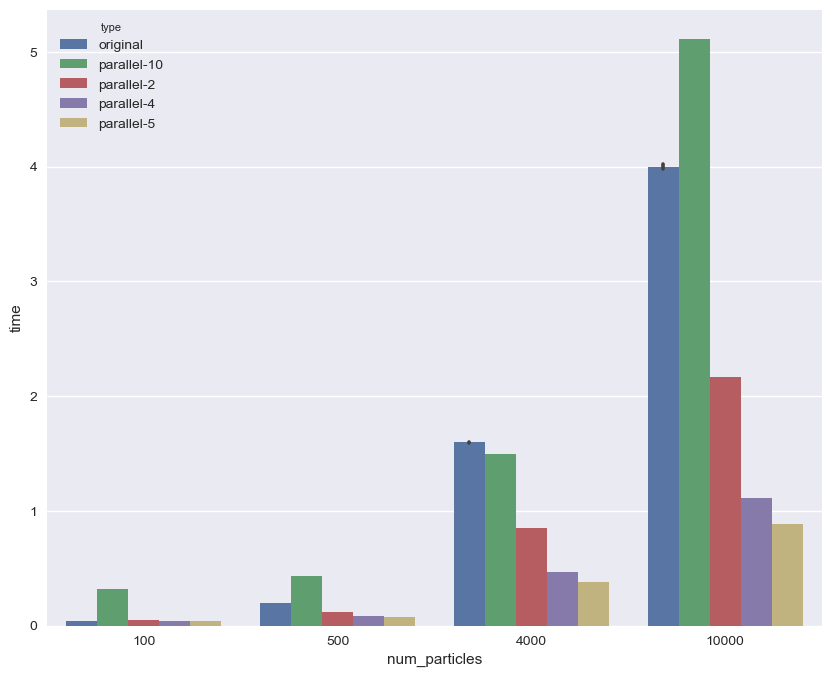

In [32]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

sns.barplot(df, x='num_particles', y='time', hue='type')
ax.set_xlabel('Number of particles')